In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hw1ai2c4/sample_submission .csv
/kaggle/input/hw1ai2c4/kmnist_test.csv/kmnist_test.csv
/kaggle/input/hw1ai2c4/kmnist_train.csv/kmnist_train.csv


In [2]:
import tensorflow as tf
from scipy import ndarray
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import skimage as sk
from skimage import transform
from scipy import ndimage
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [3]:
# Importing MNIST Kannad Dataset
train_data = pd.read_csv('/kaggle/input/hw1ai2c4/kmnist_train.csv/kmnist_train.csv')
test_data = pd.read_csv('/kaggle/input/hw1ai2c4/kmnist_test.csv/kmnist_test.csv')

In [4]:
train_data.sample(10)

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784,output
1033,18.311224,18.311224,24.792411,18.311224,29.626081,70.875641,46.506840,45.412050,18.311224,64.040950,...,70.875641,18.311224,18.311224,18.311224,18.311224,18.311224,47.188451,24.128642,18.311224,1
1078,17.963010,24.039064,17.963010,17.963010,37.960279,17.963010,17.963010,17.963010,17.963010,17.963010,...,72.490018,17.963010,17.963010,45.290312,17.963010,60.445004,17.963010,17.963010,17.963010,0
492,81.022556,22.019133,22.019133,22.019133,64.676924,22.019133,22.019133,22.019133,22.019133,22.019133,...,22.019133,22.019133,22.019133,22.019133,22.019133,71.178398,22.019133,22.019133,22.019133,1
856,15.163265,15.163265,15.163265,15.163265,15.163265,15.163265,28.793546,73.033360,28.651837,64.639150,...,15.163265,15.163265,73.033360,15.163265,53.651883,15.163265,69.411660,15.163265,73.033360,1
215,20.377551,20.377551,20.377551,24.419379,20.377551,20.377551,20.377551,20.377551,20.377551,20.377551,...,81.262608,20.377551,20.377551,20.377551,81.262608,20.377551,25.955766,20.377551,20.377551,0
64,24.283163,24.283163,88.722337,24.283163,24.283163,24.283163,88.722337,24.283163,26.002427,24.283163,...,24.283163,24.283163,24.283163,80.735267,24.283163,24.283163,88.722337,88.722337,55.106331,0
141,23.788265,37.376889,23.788265,23.788265,23.788265,23.788265,24.661320,23.788265,23.788265,25.227799,...,23.788265,23.788265,23.788265,23.788265,27.102038,23.788265,47.922275,37.850145,23.788265,0
549,24.193878,28.283537,24.193878,24.193878,24.193878,24.193878,24.193878,24.193878,24.193878,40.635832,...,24.193878,24.193878,24.193878,24.193878,24.193878,61.707755,24.193878,24.193878,24.193878,0
603,24.107143,24.107143,24.107143,56.176195,24.107143,86.916611,24.107143,24.107143,24.107143,24.107143,...,86.916611,86.916611,24.107143,24.107143,24.107143,24.107143,24.107143,24.107143,24.107143,0
72,23.228316,23.228316,23.228316,33.522704,23.228316,26.232955,23.228316,23.228316,23.228316,85.774280,...,23.228316,23.228316,23.228316,23.228316,23.228316,23.228316,23.228316,23.228316,23.228316,1


In [5]:
# Training Data
X_train = train_data.drop(['output'], axis = 1)
y_train = train_data['output']

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(test_data)

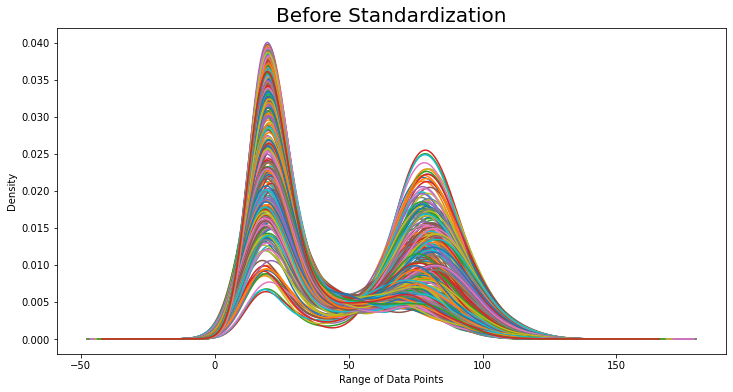

In [7]:
plt.rcParams["figure.figsize"] = (12,6)
X_train.plot.kde()
plt.title('Before Standardization', fontsize = 20)
plt.xlabel('Range of Data Points')
plt.legend([],[], frameon=False)
plt.show()

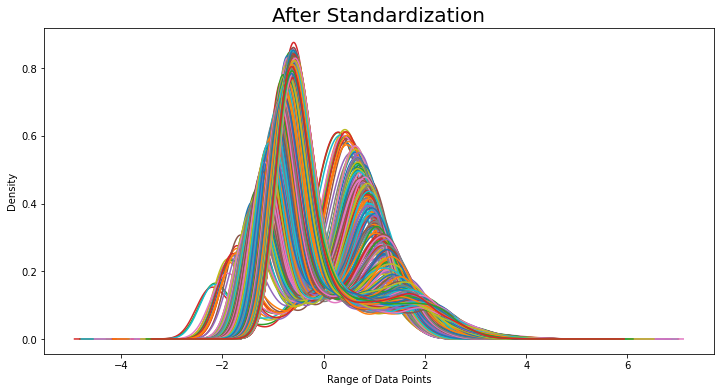

In [8]:
plt.rcParams["figure.figsize"] = (12,6)
pd.DataFrame(X_train_scaled).plot.kde()
plt.title('After Standardization', fontsize = 20)
plt.xlabel('Range of Data Points')
plt.legend([],[], frameon=False)
plt.show()

**Over Fitted Model**

In [9]:
model_1 = models.Sequential(name = 'Over_Fitted_Model')
model_1.add(layers.Dense(100, input_shape = (784,),
                        activation = 'relu',
                        kernel_initializer = RandomNormal(mean=0.0, stddev=1, seed=0),
                        name = 'hidden_1'))
model_1.add(layers.Dense(100, activation = 'relu',
                        kernel_initializer = RandomNormal(mean=0.0, stddev=1, seed=0),
                        name = 'hidden_2'))
model_1.add(layers.Dense(100, activation = 'relu',
                        kernel_initializer = RandomNormal(mean=0.0, stddev=1, seed=0),
                        name='hidden_3'))
model_1.add(layers.Dense(1, activation='sigmoid',
                        kernel_initializer = RandomNormal(mean=0.0, stddev=1, seed=0),
                        name='output'))

model_1.summary()

Model: "Over_Fitted_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 100)               78500     
_________________________________________________________________
hidden_2 (Dense)             (None, 100)               10100     
_________________________________________________________________
hidden_3 (Dense)             (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________


2022-07-11 09:57:34.273578: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


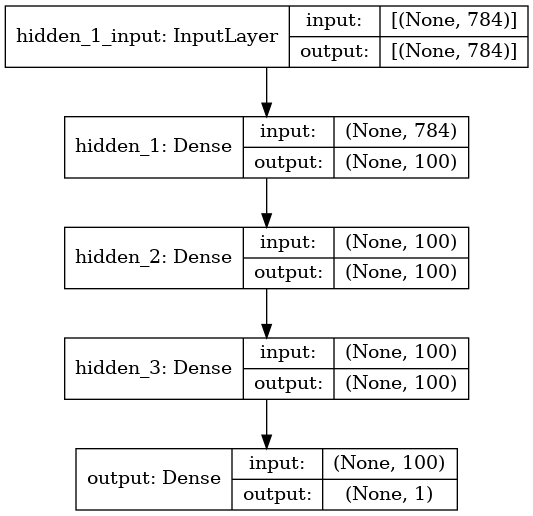

In [10]:
tf.keras.utils.plot_model(model_1, "multi_input_and_output_model_1.png", show_shapes=True)

In [11]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

history_1 = model_1.fit(X_train_scaled, y_train,
                        validation_split = 0.3,
                        batch_size = 128,
                        verbose = 0,
                        epochs = 50)

2022-07-11 09:57:35.632225: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


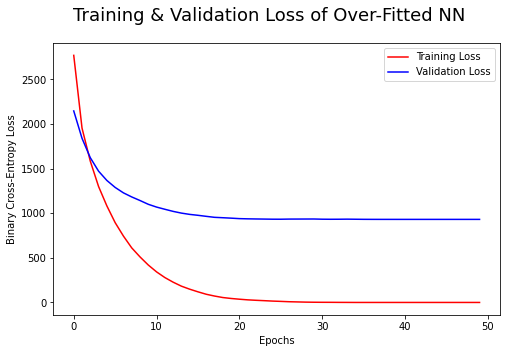

In [12]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(history_1.history['loss'],'r',label = 'Training Loss')
ax.plot(history_1.history['val_loss'],'b',label = 'Validation Loss')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Binary Cross-Entropy Loss')
fig.suptitle('Training & Validation Loss of Over-Fitted NN', fontsize = 18)
plt.show()

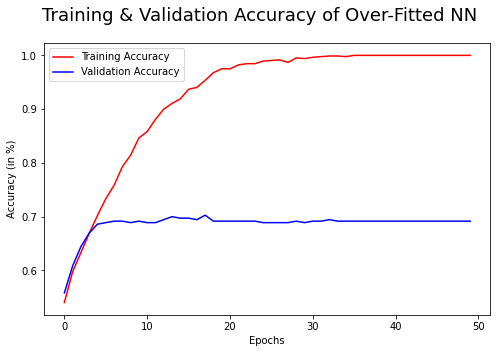

In [13]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(history_1.history['accuracy'],'r',label = 'Training Accuracy')
ax.plot(history_1.history['val_accuracy'],'b',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy (in %)')
fig.suptitle('Training & Validation Accuracy of Over-Fitted NN', fontsize = 18)
plt.show()

In [14]:
m1_train_acc = history_1.history['accuracy'][-1]
m1_test_acc = history_1.history['val_accuracy'][-1]
print(f"Over-Fitted NN Model Training Accuracy: {round(m1_train_acc*100, 3)}%")
print(f"Over-Fitted NN Model Testing Accuracy: {round(m1_test_acc*100, 3)}%")

Over-Fitted NN Model Training Accuracy: 100.0%
Over-Fitted NN Model Testing Accuracy: 69.167%


**Data Augmentation**

In [15]:
def rand_rotation(array: ndarray):
    rand_deg = random.uniform(-10, 10)
    return sk.transform.rotate(array, rand_deg)
def data_augmentor(data):
    dummy_df = []
    trans_img = None
    for i in range(len(data)):
        trans_img = rand_rotation(data.iloc[i,:-1].values.reshape((28,28)))
        if(random.randint(0,100) > 20):
            trans_img = sk.util.random_noise(trans_img,mode = 'gaussian', clip = False)
        if(random.randint(0,100) > 20):
            scale = random.randint(-10,10)/100 
            trans_img = transform.resize(transform.rescale(trans_img, 1 + scale,preserve_range = True), (28, 28), order = 0, preserve_range = False, anti_aliasing = False).astype('uint8')
        if(random.randint(0,100) > 20):
            trans_img = ndimage.gaussian_filter(trans_img, sigma=0.5)
        dummy_df.append(trans_img.flatten().tolist())
    aug_df = pd.DataFrame(dummy_df, columns=data.columns[:-1])
    aug_df['output'] = data['output']
    augmented_df = data.append(aug_df)
    return augmented_df

In [16]:
aug_data = data_augmentor(train_data)
aug_data = data_augmentor(aug_data.reset_index(drop=True))
aug_data = data_augmentor(aug_data.reset_index(drop=True))
aug_data = data_augmentor(aug_data.reset_index(drop=True))
aug_data.shape

(19200, 785)

In [17]:
X_train_aug = aug_data.drop(['output'], axis = 1)
y_train_aug = np.asarray(aug_data['output']).astype(np.float32)
X_train_aug_scaled = scaler.fit_transform(X_train_aug)
print(X_train_aug.shape, y_train_aug.shape)

(19200, 784) (19200,)


**Regularized Model**

In [18]:
model_2 = models.Sequential(name = 'Regularized_Model')
L2_reg = regularizers.L2(0.00006)
model_2.add(Dropout(0.2, input_shape=(784,)))
model_2.add(layers.Dense(100, input_shape = (784,),
                         activation = 'relu',
                         kernel_regularizer = L2_reg,
                         name = 'hidden_1'))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dense(100, activation = 'relu',
                         kernel_regularizer = L2_reg,
                         name='hidden_2'))
model_2.add(Dropout(0.10))
model_2.add(layers.Dense(100, activation='relu',
                         kernel_regularizer= L2_reg,
                         name='hidden_3'))
model_2.add(layers.Dense(1, activation='sigmoid', name='output'))

model_2.summary()

Model: "Regularized_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
hidden_2 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
hidden_3 (Dense)             (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 1)           

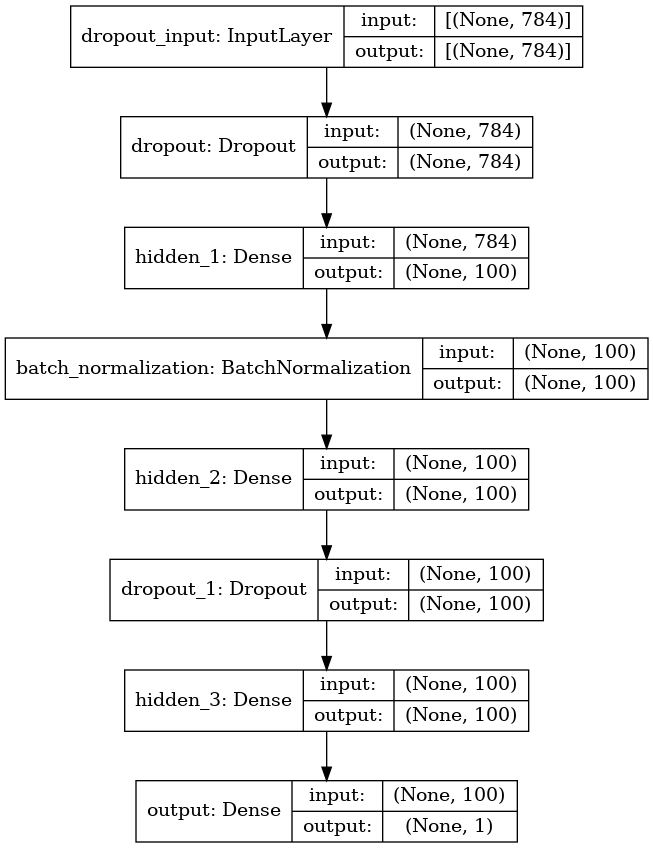

In [19]:
tf.keras.utils.plot_model(model_2, "multi_input_and_output_model_2.png", show_shapes=True)

In [20]:
model_2.compile(optimizer = optimizers.Adam(learning_rate=0.001), 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

callback = EarlyStopping(monitor='val_loss',
                         restore_best_weights=True,
                         patience=200)

history_2 = model_2.fit(X_train_aug, y_train_aug, validation_split=0.3,
                        batch_size = 128,
                        epochs = 2000,
                        verbose = 0,
                        callbacks = [callback])

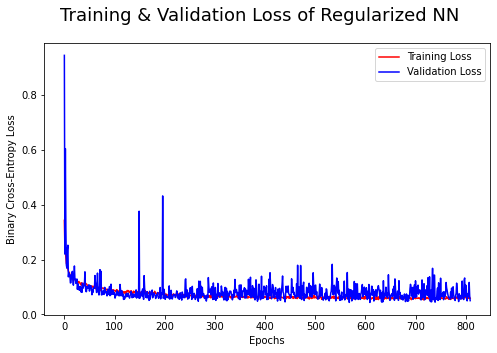

In [21]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(history_2.history['loss'],'r',label = 'Training Loss')
ax.plot(history_2.history['val_loss'],'b',label = 'Validation Loss')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Binary Cross-Entropy Loss')
fig.suptitle('Training & Validation Loss of Regularized NN', fontsize = 18)
plt.show()

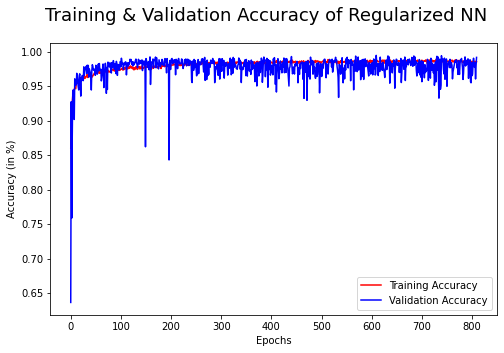

In [22]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(history_2.history['accuracy'],'r',label = 'Training Accuracy')
ax.plot(history_2.history['val_accuracy'],'b',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy (in %)')
fig.suptitle('Training & Validation Accuracy of Regularized NN', fontsize = 18)
plt.show()

In [23]:
m2_train_acc = history_2.history['accuracy'][-1]
m2_test_acc = history_2.history['val_accuracy'][-1]
print(f"Regularized NN Model Training Accuracy: {round(m2_train_acc*100, 3)}%")
print(f"Regularized NN Model Testing Accuracy: {round(m2_test_acc*100, 3)}%")

Regularized NN Model Training Accuracy: 98.534%
Regularized NN Model Testing Accuracy: 99.167%


In [24]:
predictions = (model_2.predict(test_data) > 0.5).astype("int32")

In [25]:
submission = pd.read_csv('/kaggle/input/hw1ai2c4/sample_submission .csv')

submission['category'] = predictions

submission.to_csv('submission.csv', index=False)